In [1]:
import pandas as pd, numpy as np

In [2]:
from vivarium import Artifact
from get_draws.api import get_draws

In [3]:
art = Artifact('/ihme/costeffectiveness/artifacts/vivarium_ciff_sam/ethiopia.hdf',
               filter_terms=['year_start==2019', f'age_start>=0.5'])

# State model diagram

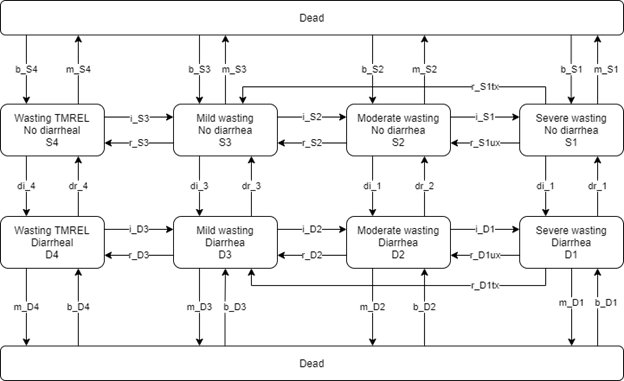

# Define constants

## Artifact values

In [4]:
wasting_exposure = art.load('risk_factor.child_wasting.exposure').reset_index()
wasting_paf = art.load('risk_factor.child_wasting.population_attributable_fraction').reset_index().drop(columns='affected_measure')
wasting_rr = art.load('risk_factor.child_wasting.relative_risk').reset_index()
wasting_rr_dd = wasting_rr.loc[wasting_rr.affected_entity=='diarrheal_diseases'].drop(columns=['affected_entity','affected_measure'])
wasting_rr_lri = wasting_rr.loc[wasting_rr.affected_entity=='lower_respiratory_infections'].drop(columns=['affected_entity','affected_measure'])
wasting_rr_measles = wasting_rr.loc[wasting_rr.affected_entity=='measles'].drop(columns=['affected_entity','affected_measure'])

prevalence_c302 = art.load('cause.diarrheal_diseases.prevalence') 
p_1 = wasting_exposure.loc[wasting_exposure.parameter=='cat1'].set_index([c for c in wasting_exposure.columns if 'draw' not in c and c != 'parameter']).drop(columns='parameter')
p_2 = wasting_exposure.loc[wasting_exposure.parameter=='cat2'].set_index([c for c in wasting_exposure.columns if 'draw' not in c and c != 'parameter']).drop(columns='parameter')
p_3 = wasting_exposure.loc[wasting_exposure.parameter=='cat3'].set_index([c for c in wasting_exposure.columns if 'draw' not in c and c != 'parameter']).drop(columns='parameter')
p_4 = wasting_exposure.loc[wasting_exposure.parameter=='cat4'].set_index([c for c in wasting_exposure.columns if 'draw' not in c and c != 'parameter']).drop(columns='parameter')

ACMR = art.load('cause.all_causes.cause_specific_mortality_rate') 
csmr_c302 = art.load('cause.diarrheal_diseases.cause_specific_mortality_rate')
emr_c302 = art.load('cause.diarrheal_diseases.excess_mortality_rate')
csmr_pem = art.load('cause.protein_energy_malnutrition.cause_specific_mortality_rate')
emr_pem = art.load('cause.protein_energy_malnutrition.excess_mortality_rate')
csmr_lri = art.load('cause.lower_respiratory_infections.cause_specific_mortality_rate')
csmr_measles = art.load('cause.measles.cause_specific_mortality_rate')
paf_wasting_lri = wasting_paf.loc[wasting_paf.affected_entity=='lower_respiratory_infections'].set_index([c for c in wasting_paf.columns if 'draw' not in c and c != 'affected_entity']).drop(columns='affected_entity')
paf_wasting_measles = wasting_paf.loc[wasting_paf.affected_entity=='measles'].set_index([c for c in wasting_paf.columns if 'draw' not in c and c != 'affected_entity']).drop(columns='affected_entity')
paf_wasting_c302 = wasting_paf.loc[wasting_paf.affected_entity=='diarrheal_diseases'].set_index([c for c in wasting_paf.columns if 'draw' not in c and c != 'affected_entity']).drop(columns='affected_entity')
incidence_c302 = art.load('cause.diarrheal_diseases.incidence_rate') 
remission_c302 = art.load('cause.diarrheal_diseases.remission_rate') 
RR_lri_1 = wasting_rr_lri.loc[wasting_rr_lri.parameter=='cat1'].set_index([c for c in wasting_rr_lri.columns if 'draw' not in c and c != 'parameter']).drop(columns='parameter')
RR_lri_2 = wasting_rr_lri.loc[wasting_rr_lri.parameter=='cat2'].set_index([c for c in wasting_rr_lri.columns if 'draw' not in c and c != 'parameter']).drop(columns='parameter')
RR_lri_3 = wasting_rr_lri.loc[wasting_rr_lri.parameter=='cat3'].set_index([c for c in wasting_rr_lri.columns if 'draw' not in c and c != 'parameter']).drop(columns='parameter')
RR_measles_1 = wasting_rr_measles.loc[wasting_rr_measles.parameter=='cat1'].set_index([c for c in wasting_rr_measles.columns if 'draw' not in c and c != 'parameter']).drop(columns='parameter')
RR_measles_2 = wasting_rr_measles.loc[wasting_rr_measles.parameter=='cat2'].set_index([c for c in wasting_rr_measles.columns if 'draw' not in c and c != 'parameter']).drop(columns='parameter')
RR_measles_3 = wasting_rr_measles.loc[wasting_rr_measles.parameter=='cat3'].set_index([c for c in wasting_rr_measles.columns if 'draw' not in c and c != 'parameter']).drop(columns='parameter')
RR_1 = wasting_rr_dd.loc[wasting_rr_dd.parameter=='cat1'].set_index([c for c in wasting_rr_dd.columns if 'draw' not in c and c != 'parameter']).drop(columns='parameter')
RR_2 = wasting_rr_dd.loc[wasting_rr_dd.parameter=='cat2'].set_index([c for c in wasting_rr_dd.columns if 'draw' not in c and c != 'parameter']).drop(columns='parameter')
RR_3 = wasting_rr_dd.loc[wasting_rr_dd.parameter=='cat3'].set_index([c for c in wasting_rr_dd.columns if 'draw' not in c and c != 'parameter']).drop(columns='parameter')
RR_4 = wasting_rr_dd.loc[wasting_rr_dd.parameter=='cat4'].set_index([c for c in wasting_rr_dd.columns if 'draw' not in c and c != 'parameter']).drop(columns='parameter')

In [5]:
# calculate custom prevalence to be consistent
prevalence_c302 = incidence_c302 * (4.3/365)
prevalence_c302

draw_0    draw_1    draw_2  \
sex    age_start age_end year_start year_end                                 
Female 0.5       1.0     2019       2020      0.033372  0.033847  0.035302   
       1.0       2.0     2019       2020      0.017023  0.019164  0.021658   
       2.0       5.0     2019       2020      0.017023  0.019164  0.021658   
Male   0.5       1.0     2019       2020      0.033707  0.033052  0.034658   
       1.0       2.0     2019       2020      0.017717  0.020140  0.022090   
       2.0       5.0     2019       2020      0.017717  0.020140  0.022090   

                                                draw_3    draw_4    draw_5  \
sex    age_start age_end year_start year_end                                 
Female 0.5       1.0     2019       2020      0.036499  0.036368  0.029878   
       1.0       2.0     2019       2020      0.019167  0.022923  0.018094   
       2.0       5.0     2019       2020      0.019167  0.022923  0.018094   
Male   0.5       1.0     2019       2020      0.035438  0.036104  0.029676   
       1.0       2.0     2019       2020      0.018011  0.023827  0.018177   
       2.0       5.0     2019       2020      0.018011  0.023827  0.018177   

                                                draw_6    draw_7    draw_8  \
sex    age_start age_end year_start year_end                                 
Female 0.5       1.0     2019       2020      0.029706  0.036008  0.038524   
       1.0       2.0     2019       2020      0.017712  0.023787  0.018131   
       2.0       5.0     2019       2020      0.017712  0.023787  0.018131   
Male   0.5       1.0     2019       2020      0.029533  0.035692  0.040429   
       1.0       2.0     2019       2020      0.017831  0.022002  0.018636   
       2.0       5.0     2019       2020      0.017831  0.022002  0.018636   

                                                draw_9  ...  draw_990  \
sex    age_start age_end year_start year_end            ...             
Female 0.5       1.0     2019       2020      0.033138  ...  0.031684   
       1.0       2.0     2019       2020      0.018098  ...  0.022248   
       2.0       5.0     2019       2020      0.018098  ...  0.022248   
Male   0.5       1.0     2019       2020      0.033046  ...  0.031626   
       1.0       2.0     2019       2020      0.018912  ...  0.022780   
       2.0       5.0     2019       2020      0.018912  ...  0.022780   

                                              draw_991  draw_992  draw_993  \
sex    age_start age_end year_start year_end                                 
Female 0.5       1.0     2019       2020      0.028832  0.030786  0.035283   
       1.0       2.0     2019       2020      0.013704  0.021242  0.020751   
       2.0       5.0     2019       2020      0.013704  0.021242  0.020751   
Male   0.5       1.0     2019       2020      0.028626  0.030814  0.033826   
       1.0       2.0     2019       2020      0.014280  0.019982  0.021004   
       2.0       5.0     2019       2020      0.014280  0.019982  0.021004   

                                              draw_994  draw_995  draw_996  \
sex    age_start age_end year_start year_end                                 
Female 0.5       1.0     2019       2020      0.030202  0.030787  0.042933   
       1.0       2.0     2019       2020      0.016802  0.015838  0.023710   
       2.0       5.0     2019       2020      0.016802  0.015838  0.023710   
Male   0.5       1.0     2019       2020      0.029905  0.031436  0.041769   
       1.0       2.0     2019       2020      0.016568  0.017384  0.022914   
       2.0       5.0     2019       2020      0.016568  0.017384  0.022914   

                                              draw_997  draw_998  draw_999  
sex    age_start age_end year_start year_end                                
Female 0.5       1.0     2019       2020      0.033879  0.027835  0.030699  
       1.0       2.0     2019       2020      0.017648  0.018447  0.017315  
       2.0       5.0     2019 

In [6]:
remission_c302 = 1 / (4.3/365) * prevalence_c302
remission_c302

draw_0    draw_1    draw_2  \
sex    age_start age_end year_start year_end                                 
Female 0.5       1.0     2019       2020      2.832730  2.873092  2.996564   
       1.0       2.0     2019       2020      1.444948  1.626751  1.838416   
       2.0       5.0     2019       2020      1.444948  1.626751  1.838416   
Male   0.5       1.0     2019       2020      2.861203  2.805571  2.941884   
       1.0       2.0     2019       2020      1.503897  1.709529  1.875083   
       2.0       5.0     2019       2020      1.503897  1.709529  1.875083   

                                                draw_3    draw_4    draw_5  \
sex    age_start age_end year_start year_end                                 
Female 0.5       1.0     2019       2020      3.098170  3.087093  2.536172   
       1.0       2.0     2019       2020      1.626972  1.945759  1.535853   
       2.0       5.0     2019       2020      1.626972  1.945759  1.535853   
Male   0.5       1.0     2019       2020      3.008117  3.064610  2.518989   
       1.0       2.0     2019       2020      1.528869  2.022543  1.542918   
       2.0       5.0     2019       2020      1.528869  2.022543  1.542918   

                                                draw_6    draw_7    draw_8  \
sex    age_start age_end year_start year_end                                 
Female 0.5       1.0     2019       2020      2.521526  3.056531  3.270019   
       1.0       2.0     2019       2020      1.503430  2.019087  1.539046   
       2.0       5.0     2019       2020      1.503430  2.019087  1.539046   
Male   0.5       1.0     2019       2020      2.506909  3.029668  3.431775   
       1.0       2.0     2019       2020      1.513575  1.867629  1.581915   
       2.0       5.0     2019       2020      1.513575  1.867629  1.581915   

                                                draw_9  ...  draw_990  \
sex    age_start age_end year_start year_end            ...             
Female 0.5       1.0     2019       2020      2.812883  ...  2.689425   
       1.0       2.0     2019       2020      1.536214  ...  1.888467   
       2.0       5.0     2019       2020      1.536214  ...  1.888467   
Male   0.5       1.0     2019       2020      2.805039  ...  2.684556   
       1.0       2.0     2019       2020      1.605330  ...  1.933651   
       2.0       5.0     2019       2020      1.605330  ...  1.933651   

                                              draw_991  draw_992  draw_993  \
sex    age_start age_end year_start year_end                                 
Female 0.5       1.0     2019       2020      2.447330  2.613238  2.994952   
       1.0       2.0     2019       2020      1.163270  1.803064  1.761430   
       2.0       5.0     2019       2020      1.163270  1.803064  1.761430   
Male   0.5       1.0     2019       2020      2.429864  2.615621  2.871302   
       1.0       2.0     2019       2020      1.212116  1.696115  1.782867   
       2.0       5.0     2019       2020      1.212116  1.696115  1.782867   

                                              draw_994  draw_995  draw_996  \
sex    age_start age_end year_start year_end                                 
Female 0.5       1.0     2019       2020      2.563659  2.613283  3.644340   
       1.0       2.0     2019       2020      1.426214  1.344372  2.012596   
       2.0       5.0     2019       2020      1.426214  1.344372  2.012596   
Male   0.5       1.0     2019       2020      2.538454  2.668392  3.545519   
       1.0       2.0     2019       2020      1.406369  1.475658  1.945014   
       2.0       5.0     2019       2020      1.406369  1.475658  1.945014   

                                              draw_997  draw_998  draw_999  
sex    age_start age_end year_start year_end                                
Female 0.5       1.0     2019       2020      2.875791  2.362733  2.605822  
       1.0       2.0     2019       2020      1.498004  1.565875  1.469757  
       2.0       5.0     2019 

In [7]:
incidence_c302

draw_0    draw_1    draw_2  \
sex    age_start age_end year_start year_end                                 
Female 0.5       1.0     2019       2020      2.832730  2.873092  2.996564   
       1.0       2.0     2019       2020      1.444948  1.626751  1.838416   
       2.0       5.0     2019       2020      1.444948  1.626751  1.838416   
Male   0.5       1.0     2019       2020      2.861203  2.805571  2.941884   
       1.0       2.0     2019       2020      1.503897  1.709529  1.875083   
       2.0       5.0     2019       2020      1.503897  1.709529  1.875083   

                                                draw_3    draw_4    draw_5  \
sex    age_start age_end year_start year_end                                 
Female 0.5       1.0     2019       2020      3.098170  3.087093  2.536172   
       1.0       2.0     2019       2020      1.626972  1.945759  1.535853   
       2.0       5.0     2019       2020      1.626972  1.945759  1.535853   
Male   0.5       1.0     2019       2020      3.008117  3.064610  2.518989   
       1.0       2.0     2019       2020      1.528869  2.022543  1.542918   
       2.0       5.0     2019       2020      1.528869  2.022543  1.542918   

                                                draw_6    draw_7    draw_8  \
sex    age_start age_end year_start year_end                                 
Female 0.5       1.0     2019       2020      2.521526  3.056531  3.270019   
       1.0       2.0     2019       2020      1.503430  2.019087  1.539046   
       2.0       5.0     2019       2020      1.503430  2.019087  1.539046   
Male   0.5       1.0     2019       2020      2.506909  3.029668  3.431775   
       1.0       2.0     2019       2020      1.513575  1.867629  1.581915   
       2.0       5.0     2019       2020      1.513575  1.867629  1.581915   

                                                draw_9  ...  draw_990  \
sex    age_start age_end year_start year_end            ...             
Female 0.5       1.0     2019       2020      2.812883  ...  2.689425   
       1.0       2.0     2019       2020      1.536214  ...  1.888467   
       2.0       5.0     2019       2020      1.536214  ...  1.888467   
Male   0.5       1.0     2019       2020      2.805039  ...  2.684556   
       1.0       2.0     2019       2020      1.605330  ...  1.933651   
       2.0       5.0     2019       2020      1.605330  ...  1.933651   

                                              draw_991  draw_992  draw_993  \
sex    age_start age_end year_start year_end                                 
Female 0.5       1.0     2019       2020      2.447330  2.613238  2.994952   
       1.0       2.0     2019       2020      1.163270  1.803064  1.761430   
       2.0       5.0     2019       2020      1.163270  1.803064  1.761430   
Male   0.5       1.0     2019       2020      2.429864  2.615621  2.871302   
       1.0       2.0     2019       2020      1.212116  1.696115  1.782867   
       2.0       5.0     2019       2020      1.212116  1.696115  1.782867   

                                              draw_994  draw_995  draw_996  \
sex    age_start age_end year_start year_end                                 
Female 0.5       1.0     2019       2020      2.563659  2.613283  3.644340   
       1.0       2.0     2019       2020      1.426214  1.344372  2.012596   
       2.0       5.0     2019       2020      1.426214  1.344372  2.012596   
Male   0.5       1.0     2019       2020      2.538454  2.668392  3.545519   
       1.0       2.0     2019       2020      1.406369  1.475658  1.945014   
       2.0       5.0     2019       2020      1.406369  1.475658  1.945014   

                                              draw_997  draw_998  draw_999  
sex    age_start age_end year_start year_end                                
Female 0.5       1.0     2019       2020      2.875791  2.362733  2.605822  
       1.0       2.0     2019       2020      1.498004  1.565875  1.469757  
       2.0       5.0     2019 

In [8]:
"""NOTE: the artifact values for diarrheal disease remission is greater than 
remission after re-scaling to the total population. I have adjusted the remission 
rate to be equal to the number of incident cases in the population minus the mortality 
rate for the average disease duration (6 days) to get the model to behave correctly. 
This method ignores correlation between diarrheal diseases and other causes"""

remission_c302 = incidence_c302 - (4.3 / 365) * (ACMR - csmr_c302 + emr_c302)
(remission_c302).apply(pd.DataFrame.describe, percentiles=[0.025,0.975], axis=1)

count      mean       std  \
sex    age_start age_end year_start year_end                               
Female 0.5       1.0     2019       2020      1000.0  2.912501  0.291066   
       1.0       2.0     2019       2020      1000.0  1.642246  0.221644   
       2.0       5.0     2019       2020      1000.0  1.642246  0.221644   
Male   0.5       1.0     2019       2020      1000.0  2.899384  0.291431   
       1.0       2.0     2019       2020      1000.0  1.667472  0.219574   
       2.0       5.0     2019       2020      1000.0  1.667472  0.219574   

                                                   min      2.5%       50%  \
sex    age_start age_end year_start year_end                                 
Female 0.5       1.0     2019       2020      2.092716  2.366304  2.894224   
       1.0       2.0     2019       2020      0.944651  1.252192  1.629800   
       2.0       5.0     2019       2020      0.944651  1.252192  1.629800   
Male   0.5       1.0     2019       2020      2.120144  2.351683  2.887071   
       1.0       2.0     2019       2020      1.065874  1.294609  1.661977   
       2.0       5.0     2019       2020      1.065874  1.294609  1.661977   

                                                 97.5%       max  
sex    age_start age_end year_start year_end                      
Female 0.5       1.0     2019       2020      3.548926  3.812310  
       1.0       2.0     2019       2020      2.098163  2.330882  
       2.0       5.0     2019       2020      2.098163  2.330882  
Male   0.5       1.0     2019       2020      3.507483  3.729331  
       1.0       2.0     2019       2020      2.110698  2.491402  
       2.0       5.0     2019       2020      2.110698  2.491402

## Wasting transition rates

These were read-in from simulation model output rather than calculating them directly given the complexity of the calculations. This should be updated as the model is finalized. The exception is for r4 and i3 (which are currently undergoing calibration)


In [9]:
output_dir ='/ihme/costeffectiveness/results/vivarium_ciff_sam/v5.3.2_remission_rate_changes/ciff_sam/2022_01_28_17_10_48/count_data/'
wasting_transitions = pd.read_csv(output_dir + 'wasting_transition_count.csv').drop(columns='Unnamed: 0')
wasting_transitions = (wasting_transitions
                       .loc[wasting_transitions.scenario=='baseline']
                       .groupby(['input_draw','sex','age','measure']).sum()
                       .drop(columns='year')
                       .reset_index())
wasting_person_time = pd.read_csv(output_dir + 'wasting_state_person_time.csv').drop(columns='Unnamed: 0')
wasting_person_time = (wasting_person_time
                       .loc[wasting_person_time.scenario=='baseline']
                       .groupby(['input_draw','sex','age','cause']).sum()
                       .drop(columns='year')
                       .reset_index())

In [10]:
def compute_wasting_transition_rate(transition_count_parameter, person_time_state, ages):
    rate = (((wasting_transitions.loc[wasting_transitions.measure==f'{transition_count_parameter}']
           .set_index(['input_draw','sex','age']).drop(columns='measure'))
          / (wasting_person_time.loc[wasting_person_time.cause==f'{person_time_state}']
             .set_index(['input_draw','sex','age']).drop(columns='cause')))
          .groupby(['sex','age']).mean().reset_index())
    rate['sex'] = rate.sex.str.capitalize()
    rate['year_start']=2019
    rate['year_end']=2020
    rate = rate.loc[rate.age.isin(ages)]
    rate['age_start'] = np.where(rate.age=='6-11_months',0.5,
                                np.where(rate.age=='12_to_23_months', 1.0, 2.0))
    rate['age_end'] = np.where(rate.age=='6-11_months',1.0,
                                np.where(rate.age=='12_to_23_months', 2.0, 5.0))
    for i in list(range(0,1000)):
        rate[f'draw_{i}'] = rate['value']
    return rate.drop(columns=['age','value']).set_index(['sex','age_start','age_end','year_start','year_end']).sort_index()

In [11]:
ages = ['6-11_months','12_to_23_months','2_to_4']
t1 = compute_wasting_transition_rate('severe_acute_malnutrition_to_mild_child_wasting_event_count', 
                                     'severe_acute_malnutrition', ages)
r2 = compute_wasting_transition_rate('severe_acute_malnutrition_to_moderate_acute_malnutrition_event_count', 
                                     'severe_acute_malnutrition', ages)
r3 = compute_wasting_transition_rate('moderate_acute_malnutrition_to_mild_child_wasting_event_count', 
                                     'moderate_acute_malnutrition', ages)
r4 = compute_wasting_transition_rate('mild_child_wasting_to_susceptible_to_child_wasting_event_count', 
                                     'mild_child_wasting', ages)
i1 = compute_wasting_transition_rate('moderate_acute_malnutrition_to_severe_acute_malnutrition_event_count', 
                                     'moderate_acute_malnutrition', ages)
i2 = compute_wasting_transition_rate('mild_child_wasting_to_moderate_acute_malnutrition_event_count', 
                                     'mild_child_wasting', ages)
i3 = compute_wasting_transition_rate('susceptible_to_child_wasting_to_mild_child_wasting_event_count', 
                                     'susceptible_to_child_wasting', ages)

<ipython-input-10-454c7b47a107>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  rate[f'draw_{i}'] = rate['value']


## Prevalence ratios

In [12]:
PR_1=1.060416
PR_2=1.061946
PR_3=1.044849
PR_4=0.990530

# Solve for parameters

## State prevalence values

In [13]:
# prevalence values
p_D1 = (PR_1 * p_1 * prevalence_c302) / (PR_1 * prevalence_c302 - prevalence_c302 + 1)
p_D2 = (PR_2 * p_2 * prevalence_c302) / (PR_2 * prevalence_c302 - prevalence_c302 + 1)
p_D3 = (PR_3 * p_3 * prevalence_c302) / (PR_3 * prevalence_c302 - prevalence_c302 + 1)
p_S1 = (-p_1 * prevalence_c302 + p_1) / (PR_1 * prevalence_c302 - prevalence_c302 + 1)
p_S2 = (-p_2 * prevalence_c302 + p_2) / (PR_2 * prevalence_c302 - prevalence_c302 + 1)
p_S3 = (-p_3 * prevalence_c302 + p_3) / (PR_3 * prevalence_c302 - prevalence_c302 + 1)
p_D4 = prevalence_c302 - p_D1 - p_D2 - p_D3
p_S4 = (1 - prevalence_c302) - p_S1 - p_S2 - p_S3

In [14]:
print(p_D1.mean().mean(),
      p_D2.mean().mean(), 
      p_D3.mean().mean(),
      p_D4.mean().mean())
print((p_D1/prevalence_c302).mean().mean(),
      (p_D2/prevalence_c302).mean().mean(), 
      (p_D3/prevalence_c302).mean().mean(),
      (p_D4/prevalence_c302).mean().mean())

0.0006416260716383071 0.002197603163884727 0.005400417726652936 0.01617627610519083
0.02425019697007908 0.0876790180419497 0.22132537048223408 0.6667454145057371


In [15]:
print(p_S1.mean().mean(),
      p_S2.mean().mean(), 
      p_S3.mean().mean(),
      p_S4.mean().mean())
print((p_S1/(1-prevalence_c302)).mean().mean(),
      (p_S2/(1-prevalence_c302)).mean().mean(), 
      (p_S3/(1-prevalence_c302)).mean().mean(),
      (p_S4/(1-prevalence_c302)).mean().mean())

0.022263499323322895 0.08049506743098515 0.206656610434217 0.6661688997441081
0.02286856947658191 0.0825644788359763 0.21182522113935517 0.6827417305480867


In [16]:
for param in [p_D1,p_D2,p_D3,p_D4,p_S1,p_S2,p_S3,p_S4
             ]:
    name = [x for x in globals() if globals()[x] is param][0]
    assert param.min().min()>0, 'negative values'
    assert param.max().max()<1, 'values greater than 1'
    
assert np.all((p_D1+p_D2+p_D3+p_D4+p_S1+p_S2+p_S3+p_S4).round(5)==1), 'Prevalence parameters do not all sum to one'

## Other intermediate variables

We are making that assumption that wasting relative risks apply to 
excess mortality, NOT incidence

In [71]:
fraction_emr = 0.99
fraction_inc = 1 - fraction_emr

m_D1 = (ACMR - csmr_c302 + fraction_emr*(emr_c302 * (1 - paf_wasting_c302) * RR_1) + (1-fraction_emr)*emr_c302
        - csmr_pem + emr_pem
        - csmr_lri + csmr_lri * (1 - paf_wasting_lri) * RR_lri_1
        - csmr_measles + csmr_measles * (1 - paf_wasting_measles) * RR_measles_1) * p_D1

m_D2 = (ACMR - csmr_c302 + fraction_emr*(emr_c302 * (1 - paf_wasting_c302) * RR_2) + (1-fraction_emr)*emr_c302
        - csmr_pem + emr_pem
        - csmr_lri + csmr_lri * (1 - paf_wasting_lri) * RR_lri_2
        - csmr_measles + csmr_measles * (1 - paf_wasting_measles) * RR_measles_2) * p_D2

m_D3 = (ACMR - csmr_c302 + fraction_emr*(emr_c302 * (1 - paf_wasting_c302) * RR_3) + (1-fraction_emr)*emr_c302
        - csmr_pem
        - csmr_lri + csmr_lri * (1 - paf_wasting_lri) * RR_lri_3
        - csmr_measles + csmr_measles * (1 - paf_wasting_measles) * RR_measles_3) * p_D3

print(m_D1.mean().mean(),
     m_D2.mean().mean(),
     m_D3.mean().mean())
print((m_D1/p_D1).mean().mean(),
     (m_D2/p_D2).mean().mean(),
     (m_D3/p_D3).mean().mean())

0.00028912476735557457 0.00027421377736647966 0.0003106321570811168
0.3757340759921382 0.11008163066566964 0.05238154618673237


In [72]:
di_1 = ((fraction_inc * incidence_c302 * (1 - paf_wasting_c302) * RR_1
         + (1 - fraction_inc) * incidence_c302) 
        * p_S1/(1-prevalence_c302))

di_2 = ((fraction_inc * incidence_c302 * (1 - paf_wasting_c302) * RR_2
         + (1 - fraction_inc) * incidence_c302) 
        * p_S2/(1-prevalence_c302))

di_3 = ((fraction_inc * incidence_c302 * (1 - paf_wasting_c302) * RR_3
         + (1 - fraction_inc) * incidence_c302) 
        * p_S3/(1-prevalence_c302))

di_4 = ((fraction_inc * incidence_c302 * (1 - paf_wasting_c302) * RR_4
         + (1 - fraction_inc) * incidence_c302) 
        * p_S4/(1-prevalence_c302))


print(di_1.mean().mean(), di_2.mean().mean(), di_3.mean().mean(), di_4.mean().mean())
print((di_1/p_S1).mean().mean(), 
      (di_2/p_S2).mean().mean(), 
      (di_3/p_S3).mean().mean(), 
      (di_4/p_S4).mean().mean())

0.054660317215700874 0.17759128118409523 0.4387169345483655 1.4015335695396758
2.272265631450062 2.1536444225266216 2.1295679434124692 2.121627100368153


In [73]:
dr_1 = remission_c302 / prevalence_c302 * p_D1
dr_2 = remission_c302 / prevalence_c302 * p_D2
dr_3 = remission_c302 / prevalence_c302 * p_D3
dr_4 = remission_c302 / prevalence_c302 * p_D4

print(dr_1.mean().mean(), dr_2.mean().mean(), dr_3.mean().mean(), dr_4.mean().mean())
print((dr_1/p_D1).mean().mean(), 
      (dr_2/p_D2).mean().mean(), 
      (dr_3/p_D3).mean().mean(), 
      (dr_4/p_D4).mean().mean())

0.05444620549524221 0.18648314737283164 0.45826856718757913 1.3726891376391264
84.8584270282239 84.85842702822391 84.85842702822391 84.85842702822391


In [74]:
b_D1 = ACMR * p_D1
b_D2 = ACMR * p_D2
b_D3 = ACMR * p_D3

r_D1tx = t1 * p_D1 
r_D1ux = r2 * p_D1
r_D2 = r3 * p_D2
r_D3 = r4 * p_D3

In [75]:
assert np.all((m_D1 / p_D1) > (m_D2 / p_D2)), 'Mortality rate of D1 state less than D2 state'
assert np.all((m_D2 / p_D2) > (m_D3 / p_D3)), 'Mortality rate of D2 state less than D3 state'

## Incidence rates

In [76]:
i_S1 = b_D1 + di_1 - dr_1 + i1*p_2 - m_D1 - r_D1tx - r_D1ux
i_S2 = b_D1 + b_D2 + 2.0*di_1 - dr_1 - dr_2 + i2*p_3 - m_D1 - m_D2 - r_D1tx - r_D2
i_S3 = b_D1 + b_D2 + b_D3 + 2.0*di_1 + di_3 - dr_1 - dr_2 - dr_3 + i3*p_4 - m_D1 - m_D2 - m_D3 - r_D3
i_D1 = -b_D1 - di_1 + dr_1 + m_D1 + r_D1tx + r_D1ux
i_D2 = -b_D1 - b_D2 - 2.0*di_1 + dr_1 + dr_2 + m_D1 + m_D2 + r_D1tx + r_D2
i_D3 = -b_D1 - b_D2 - b_D3 - 2.0*di_1 - di_3 + dr_1 + dr_2 + dr_3 + m_D1 + m_D2 + m_D3 + r_D3

In [77]:
for param in [i_S1, i_S2, i_S3, i_D1, i_D2, i_D3
             ]:
    name = [x for x in globals() if globals()[x] is param][0]
    assert param.min().min()>0, 'negative values'

In [78]:
print(i_S1.mean().mean(), i_S2.mean().mean(), i_S3.mean().mean())
print(i_D1.mean().mean(), i_D2.mean().mean(), i_D3.mean().mean())

0.14370273483947893 0.36813663969365445 2.307138237428543
0.004469624348757103 0.1471229369773486 0.21822560496688903


In [79]:
RR_i3 = (i_D3 * p_S4) / (i_S3 * p_D4)
RR_i2 = (i_D2 * p_S3) / (i_S2 * p_D3)
RR_i1 = (i_D1 * p_S2) / (i_S1 * p_D2)

In [80]:
print(RR_i3.mean().mean(), RR_i2.mean().mean(), RR_i1.mean().mean())

3.858771297358815 15.444695541215475 1.0295797320773608


In [81]:
assert np.all((i1 * p_2).transpose().sort_index().transpose().round(8) == (i_S1 + i_D1).round(8)), 'eq1 untrue'
assert np.all((i2 * p_3).transpose().sort_index().transpose().round(8) == (i_S2 + i_D2).round(8)), 'eq2 untrue'
assert np.all((i3 * p_4).transpose().sort_index().transpose().round(8) == (i_S3 + i_D3).round(8)), 'eq3 untrue'
assert np.all((i_D3 + di_3 + b_D3 + r_D2 + r_D1tx).round(8) 
              == (r_D3 + dr_3 + m_D3 + i_D2).round(8)), 'eq4 untrue'
assert np.all((i_D2 + di_1 + r_D1ux + b_D2).round(8)
             == (r_D2 + dr_2 + i_D1 + m_D2).round(8)), 'eq5 untrue'
assert np.all((i_D1 + di_1 + b_D1).round(8) 
             == (dr_1 + m_D1 + r_D1tx + r_D1ux).round(8)), 'eq6 untrue'

In [82]:
for param in [i_S1, i_S2, i_S3, i_D1, i_D2, i_D3
             ]:
    name = [x for x in globals() if globals()[x] is param][0]
    assert param.min().min()>0, 'negative values'

In [83]:
RR_i3.apply(pd.DataFrame.describe, percentiles=[0.025,0.975], axis=1)

count      mean       std  \
sex    age_start age_end year_start year_end                               
Female 0.5       1.0     2019       2020      1000.0  4.068616  0.095053   
       1.0       2.0     2019       2020      1000.0  3.751242  0.079675   
       2.0       5.0     2019       2020      1000.0  3.597468  0.087404   
Male   0.5       1.0     2019       2020      1000.0  4.043839  0.108768   
       1.0       2.0     2019       2020      1000.0  3.952872  0.090781   
       2.0       5.0     2019       2020      1000.0  3.738591  0.092110   

                                                   min      2.5%       50%  \
sex    age_start age_end year_start year_end                                 
Female 0.5       1.0     2019       2020      3.711545  3.888107  4.069647   
       1.0       2.0     2019       2020      3.512432  3.602424  3.750416   
       2.0       5.0     2019       2020      3.382986  3.437298  3.596071   
Male   0.5       1.0     2019       2020      3.725763  3.833709  4.043381   
       1.0       2.0     2019       2020      3.678852  3.775924  3.949847   
       2.0       5.0     2019       2020      3.448904  3.556980  3.738456   

                                                 97.5%       max  
sex    age_start age_end year_start year_end                      
Female 0.5       1.0     2019       2020      4.258910  4.463482  
       1.0       2.0     2019       2020      3.905348  4.011061  
       2.0       5.0     2019       2020      3.775115  3.869493  
Male   0.5       1.0     2019       2020      4.260308  4.488816  
       1.0       2.0     2019       2020      4.134383  4.289512  
       2.0       5.0     2019       2020      3.916485  4.047251

In [84]:
RR_i2.apply(pd.DataFrame.describe, percentiles=[0.025,0.975], axis=1)

count       mean       std  \
sex    age_start age_end year_start year_end                                
Female 0.5       1.0     2019       2020      1000.0  15.652753  0.882851   
       1.0       2.0     2019       2020      1000.0  16.055159  0.751630   
       2.0       5.0     2019       2020      1000.0  17.575213  0.891994   
Male   0.5       1.0     2019       2020      1000.0  13.217963  0.646275   
       1.0       2.0     2019       2020      1000.0  13.912716  0.541245   
       2.0       5.0     2019       2020      1000.0  16.254370  0.771931   

                                                    min       2.5%        50%  \
sex    age_start age_end year_start year_end                                    
Female 0.5       1.0     2019       2020      13.378585  14.121998  15.582321   
       1.0       2.0     2019       2020      13.945456  14.820976  15.982791   
       2.0       5.0     2019       2020      15.158914  16.080149  17.472326   
Male   0.5       1.0     2019       2020      11.636111  12.115200  13.165228   
       1.0       2.0     2019       2020      12.405535  12.993153  13.873190   
       2.0       5.0     2019       2020      14.468994  14.890864  16.201547   

                                                  97.5%        max  
sex    age_start age_end year_start year_end                        
Female 0.5       1.0     2019       2020      17.626664  18.732276  
       1.0       2.0     2019       2020      17.749740  18.676956  
       2.0       5.0     2019       2020      19.548124  20.662552  
Male   0.5       1.0     2019       2020      14.603285  15.300045  
       1.0       2.0     2019       2020      15.036130  16.261614  
       2.0       5.0     2019       2020      17.876633  19.741099

In [85]:
RR_i1.apply(pd.DataFrame.describe, percentiles=[0.025,0.975], axis=1)

count      mean       std  \
sex    age_start age_end year_start year_end                               
Female 0.5       1.0     2019       2020      1000.0  1.010285  0.115504   
       1.0       2.0     2019       2020      1000.0  1.031831  0.139676   
       2.0       5.0     2019       2020      1000.0  0.908574  0.161724   
Male   0.5       1.0     2019       2020      1000.0  1.123806  0.103239   
       1.0       2.0     2019       2020      1000.0  1.104684  0.117786   
       2.0       5.0     2019       2020      1000.0  0.998299  0.138374   

                                                   min      2.5%       50%  \
sex    age_start age_end year_start year_end                                 
Female 0.5       1.0     2019       2020      0.680801  0.793082  1.007364   
       1.0       2.0     2019       2020      0.543337  0.749435  1.028408   
       2.0       5.0     2019       2020      0.432570  0.583219  0.906931   
Male   0.5       1.0     2019       2020      0.759143  0.922091  1.124543   
       1.0       2.0     2019       2020      0.788848  0.864827  1.102701   
       2.0       5.0     2019       2020      0.542871  0.739654  0.994621   

                                                 97.5%       max  
sex    age_start age_end year_start year_end                      
Female 0.5       1.0     2019       2020      1.239062  1.374743  
       1.0       2.0     2019       2020      1.300827  1.483567  
       2.0       5.0     2019       2020      1.229394  1.501972  
Male   0.5       1.0     2019       2020      1.326710  1.399067  
       1.0       2.0     2019       2020      1.329393  1.510569  
       2.0       5.0     2019       2020      1.279518  1.558391